## Import libraries

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

## Load and inspect dataset

In [5]:
df = pd.read_csv(f"{os.getcwd()}\\titanic_train.csv")
print(df)
print(df.info())

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## Clean and preprocess data

### Drop unrelevant features

In [6]:
# Drop the features "Name", "Ticket", "Cabin" and "PassengerId"
df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Check for null values

In [7]:
null_counts = df.isnull().sum()
null_counts

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
# drop 2 rows where Embarked is Nan values
df.dropna(subset=["Embarked"], axis=0, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Correlation Matrix to understand which features are correlated

In [9]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000


### Find most correlated feature to "Age"

In [10]:
#Get the column that the most correlated to the Age, so we can substitute Age Nan values based on this retrieved column

#copying correlation matrix to the new variable without "Age" row
corr_matrix_age = corr_matrix.drop("Age");

#substituting negative values as we want to measure the "strength" of correlation, not its sign
corr_matrix_age.loc[corr_matrix_age["Age"]<0, "Age"] *= -1

#finding the column that has the strongest correlation with "Age" column
corr_for_age = corr_matrix_age[corr_matrix_age["Age"] == corr_matrix_age["Age"].max()].index.item()

corr_for_age

'Pclass'

### Substituting Age null values with meaningful values based on "Pclass"

In [11]:
total_age_mean = df["Age"].mean()
print(f"Average age of all passengers is {total_age_mean}")


for el in np.sort(df[corr_for_age].unique()):
  # Searching for average age of passengers based on their passenger class(1st, 2nd, 3rd)
  age_mean_el = df.loc[df[corr_for_age]==el, "Age"].mean()

  # Substituting null values in age column with age_mean values respectively to the passenger's pclass
  df.loc[df[corr_for_age]==el, "Age"] = df.loc[df[corr_for_age]==el, "Age"].fillna(age_mean_el)

  print(f"Average age of passengers from the class {el} is {age_mean_el}")

Average age of all passengers is 29.64209269662921
Average age of passengers from the class 1 is 38.10554347826087
Average age of passengers from the class 2 is 29.87763005780347
Average age of passengers from the class 3 is 25.14061971830986


In [12]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00000,1,0,7.2500,S
1,1,1,female,38.00000,1,0,71.2833,C
2,1,3,female,26.00000,0,0,7.9250,S
3,1,1,female,35.00000,1,0,53.1000,S
4,0,3,male,35.00000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00000,0,0,13.0000,S
887,1,1,female,19.00000,0,0,30.0000,S
888,0,3,female,25.14062,1,2,23.4500,S
889,1,1,male,26.00000,0,0,30.0000,C


### One-hot encoding for 'Sex' and 'Embarked'

In [13]:
#Convert 'Sex' column
sex = pd.get_dummies(df["Sex"])
df = pd.concat([df, sex], axis=1)

#drop columns "Sex" and "female" as they are redundant
df.drop(["Sex", "female"], axis=1, inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.00000,1,0,7.2500,S,True
1,1,1,38.00000,1,0,71.2833,C,False
2,1,3,26.00000,0,0,7.9250,S,False
3,1,1,35.00000,1,0,53.1000,S,False
4,0,3,35.00000,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,S,True
887,1,1,19.00000,0,0,30.0000,S,False
888,0,3,25.14062,1,2,23.4500,S,False
889,1,1,26.00000,0,0,30.0000,C,True


In [14]:
#Convert 'Embarked' column
embarked = pd.get_dummies(df["Embarked"])
df = pd.concat([df, embarked], axis=1)

#drop Embarked and "C" columns as it is redundant (we can get data from two columns only (Q and S))
df.drop(columns=["Embarked", "C"], axis=1, inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.2500,True,False,True
1,1,1,38.00000,1,0,71.2833,False,False,False
2,1,3,26.00000,0,0,7.9250,False,False,True
3,1,1,35.00000,1,0,53.1000,False,False,True
4,0,3,35.00000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,True,False,True
887,1,1,19.00000,0,0,30.0000,False,False,True
888,0,3,25.14062,1,2,23.4500,False,False,True
889,1,1,26.00000,0,0,30.0000,True,False,False


## Standardize data

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#getting features
X=df.iloc[:,1:]

X_scaled = sc.fit_transform(X)

## PCA - Principal component analysis

### 4 Features

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.12966573,  0.27908912,  0.90542992,  0.46544573],
       [ 2.00646007, -0.47102533, -1.42810272, -0.44546084],
       [-0.6196783 ,  0.21970348,  0.31493327, -1.66504577],
       ...,
       [ 0.34082867,  2.07377611,  0.53298206, -1.12278978],
       [ 0.57142209, -1.12379143, -0.89012885,  0.7015763 ],
       [-1.85640762, -0.44247934, -3.02751827,  0.95511167]])

### Variance Ratio

In [17]:
print(f"pca.explained_variance_ratio_ {pca.explained_variance_ratio_}")
print(f"total {np.sum(pca.explained_variance_ratio_)}")

pca.explained_variance_ratio_ [0.23214426 0.2171505  0.19378601 0.10476344]
total 0.7478442132349031


### 3 Features

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.12966573,  0.27908912,  0.90542992],
       [ 2.00646007, -0.47102533, -1.42810272],
       [-0.6196783 ,  0.21970348,  0.31493327],
       ...,
       [ 0.34082867,  2.07377611,  0.53298206],
       [ 0.57142209, -1.12379143, -0.89012885],
       [-1.85640762, -0.44247934, -3.02751827]])

### Variance Ratio

In [19]:
print(f"pca.explained_variance_ratio_ {pca.explained_variance_ratio_}")
print(f"total {np.sum(pca.explained_variance_ratio_)}")

pca.explained_variance_ratio_ [0.23214426 0.2171505  0.19378601]
total 0.6430807757673533


### 2 Features

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.12966573,  0.27908912],
       [ 2.00646007, -0.47102533],
       [-0.6196783 ,  0.21970348],
       ...,
       [ 0.34082867,  2.07377611],
       [ 0.57142209, -1.12379143],
       [-1.85640762, -0.44247934]])

### Visualizing the Principal Components

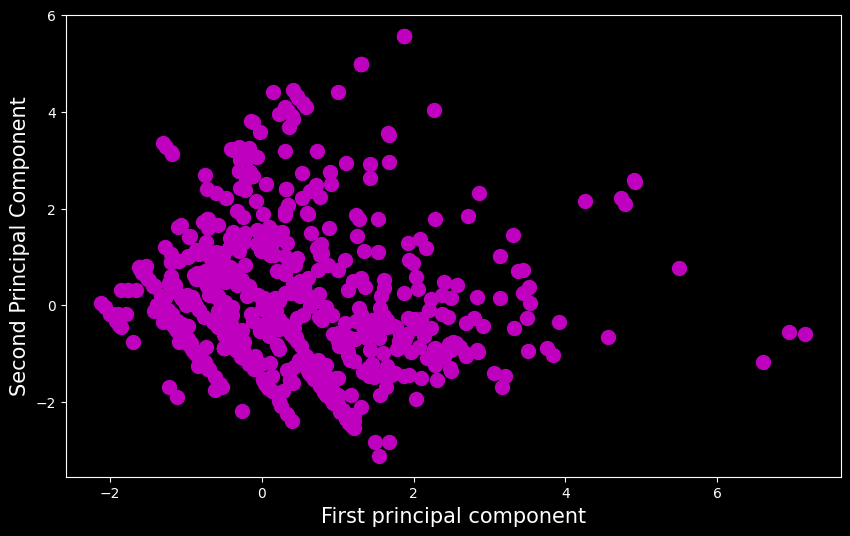

In [21]:
plt.figure(figsize = (10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 100, c = 'm')
plt.xlabel('First principal component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)

plt.show()

### Variance Ratio

In [22]:
print(f"pca.explained_variance_ratio_ {pca.explained_variance_ratio_}")
print(f"total {np.sum(pca.explained_variance_ratio_)}")

pca.explained_variance_ratio_ [0.23214426 0.2171505 ]
total 0.4492947650553085


## DBSCAN clustering using two principal components

In [23]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5)
y_dbscan = dbscan.fit_predict(X_pca)

In [24]:
y_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

### Evaluating DBSCAN performance by Silhouette Score

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
print(f'Silhouette Score for eps=0.5 : {silhouette_score(X_pca, y_dbscan)}')

Silhouette Score for eps=0.5 : 0.5116935943571138


### Selecting Value of Epsilon and Number of Points based on Silhouette Score

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
samples_range = np.arange(2, 10)
silhouette_scores_dbscan = []

for eps in eps_range:
  for samples in samples_range :
    dbscan = DBSCAN(eps=eps, min_samples=samples)
    y_dbscan = dbscan.fit_predict(X_pca)

    num_clusters = len(np.unique(y_dbscan))

    #number of clusters should be more than 1
    if num_clusters > 2:
      # Calculate the Silhouette Score
      silhouette_scores_dbscan.append({"epsilon": eps, "points": samples, "silhouette_score": silhouette_score(X_pca, y_dbscan), "y_dbscan": y_dbscan})

# Searching for the maximun Silhouette Score to identify the best epsilon and number of points
max = 0;
for index, element in enumerate(silhouette_scores_dbscan):
  if silhouette_scores_dbscan[index]['silhouette_score'] > silhouette_scores_dbscan[max]['silhouette_score']:
    max = index

ss_dbscan_best_eps = silhouette_scores_dbscan[max]['epsilon']
ss_dbscan_best_points = silhouette_scores_dbscan[max]['points']
ss_dbscan_best_ss = silhouette_scores_dbscan[max]['silhouette_score']
print(f"the best epsilon is {ss_dbscan_best_eps}")
print(f"the best number of points is {ss_dbscan_best_points}")
print(f"silhouette_score is {ss_dbscan_best_ss}")
print("y_dbscan is")
print(silhouette_scores_dbscan[max]['y_dbscan'])

the best epsilon is 0.7
the best number of points is 5
silhouette_score is 0.5736182354302821
y_dbscan is
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0

### Selecting Value of Epsilon and Number of Points based on CH-Index

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score

eps_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
samples_range = np.arange(2, 10)
ch_indexes_dbscan = []

for eps in eps_range:
  for samples in samples_range :
    dbscan = DBSCAN(eps=eps, min_samples=samples)
    y_dbscan = dbscan.fit_predict(X_pca)

    num_clusters = len(np.unique(y_dbscan))

    #number of clusters should be more than 1
    if num_clusters > 2:
      # Calculate the Silhouette Score
      ch_indexes_dbscan.append({"epsilon": eps, "points": samples, "ch_index": calinski_harabasz_score(X_pca, y_dbscan), "y_dbscan": y_dbscan})

# Searching for the maximun CH-Index to identify the best epsilon and number of points
max = 0;
for index, element in enumerate(ch_indexes_dbscan):
  if ch_indexes_dbscan[index]['ch_index'] > ch_indexes_dbscan[max]['ch_index']:
    max = index

ch_dbscan_best_eps = ch_indexes_dbscan[max]['epsilon']
ch_dbscan_best_points = ch_indexes_dbscan[max]['points']
ch_dbscan_best_ch = ch_indexes_dbscan[max]['ch_index']
print(f"the best epsilon is {ch_dbscan_best_eps}")
print(f"the best number of points is {ch_dbscan_best_points}")
print(f"CH-Index is {ch_dbscan_best_ch}")
print("y_dbscan is")
print(ch_indexes_dbscan[max]['y_dbscan'])

the best epsilon is 0.4
the best number of points is 8
CH-Index is 149.17709044035698
y_dbscan is
[ 0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0
  0 -1  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0
  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0 -

## Comparing best Silhouette Score and best CH-Index

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=ch_dbscan_best_eps, min_samples=ch_dbscan_best_points)
y_dbscan = dbscan.fit_predict(X_pca)
ss_four_eight = silhouette_score(X_pca, y_dbscan)
ch_four_eight = calinski_harabasz_score(X_pca, y_dbscan)
print(f'Silhouette Score for eps={ch_dbscan_best_eps} and points={ch_dbscan_best_points} : {ss_four_eight}')
print(f'CH-Index for eps={ch_dbscan_best_eps} and points={ch_dbscan_best_points} : {ch_four_eight}')

print()

dbscan = DBSCAN(eps=ss_dbscan_best_eps, min_samples=ss_dbscan_best_points)
y_dbscan = dbscan.fit_predict(X_pca)
ss_seven_five = silhouette_score(X_pca, y_dbscan)
ch_seven_five = calinski_harabasz_score(X_pca, y_dbscan)
print(f'Silhouette Score for eps={ss_dbscan_best_eps} and points={ss_dbscan_best_points} : {ss_seven_five}')
print(f'CH-Index for eps={ss_dbscan_best_eps} and points={ss_dbscan_best_points} : {ch_seven_five}')


Silhouette Score for eps=0.4 and points=8 : 0.43342891433607955
CH-Index for eps=0.4 and points=8 : 149.17709044035698

Silhouette Score for eps=0.7 and points=5 : 0.5736182354302821
CH-Index for eps=0.7 and points=5 : 58.51947704610827


In [30]:
print(f"Difference between Silhouette Scores of dbscan results with epsilon = {ch_dbscan_best_eps} and minimum samples = {ch_dbscan_best_points}")
print(f"and dbscan results with epsilon = {ss_dbscan_best_eps} and minimum samples = {ss_dbscan_best_eps}")
ss = ((ss_four_eight/ss_seven_five)-1)*100
print(f"{ss}%")

print()

print(f"Difference between CH-Indexes of dbscan results with epsilon = {ch_dbscan_best_eps} and minimum samples = {ch_dbscan_best_points}")
print(f"and dbscan results with epsilon = {ss_dbscan_best_eps} and minimum samples = {ss_dbscan_best_eps}")
ch = ((ch_four_eight/ch_seven_five)-1)*100
print(f"{ch}%")

Difference between Silhouette Scores of dbscan results with epsilon = 0.4 and minimum samples = 8
and dbscan results with epsilon = 0.7 and minimum samples = 0.7
-24.43948124993688%

Difference between CH-Indexes of dbscan results with epsilon = 0.4 and minimum samples = 8
and dbscan results with epsilon = 0.7 and minimum samples = 0.7
154.91870052567006%


## Summary

When comparing the results of two DBSCAN models, we observe the following: The Silhouette Score of the model with ε (epsilon) = 0.4 and minimum samples = 8 is 24% lower than that of the model with ε = 0.7 and minimum samples = 7. However, the Calinski-Harabasz Index (CH-Index) for the ε = 0.4, min samples = 8 model is 155% higher than for the model with ε = 0.7, min samples = 7. This indicates that the CH-Index should be prioritized when evaluating these models, suggesting that the DBSCAN model with ε = 0.4 and min samples = 8 performs better overall.

---

However, for the Titanic dataset, DBSCAN does not effectively separate the data into distinct clusters of passengers who survived and those who did not. This suggests that DBSCAN is not an appropriate clustering algorithm for this dataset.